<a href="https://colab.research.google.com/github/naomori/codexa_DecisionTree_RandomForest/blob/master/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 決定木の概要

# Section.3: シンプルな分類

In [0]:
# 必要なライブラリーをインポート
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
import graphviz

## データの読み込み

In [0]:
# Scikit-learnからIrisデータを読み込む
# iris は Bunch 型のデータ
iris = load_iris()

In [3]:
# dataで特徴量データへアクセス（0〜5行のデータを表示）
print(iris.data[0:5])

# targetでターゲットへアクセス（0〜5行のデータを表示）
print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


## モデルの訓練

In [0]:
# 決定木モデルの訓練
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2)
clf = clf.fit(iris.data, iris.target)

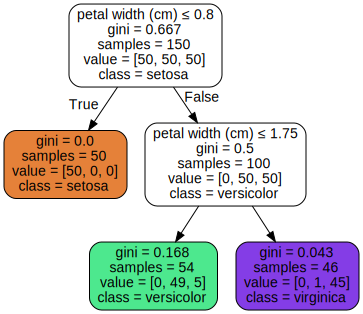

In [12]:
# 訓練済みの決定木の視覚化
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                rounded = True,
                                filled = True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Section.4: シンプルな回帰

## データの読み込み

In [13]:
# Scikit-learnからデータの読み込み
diabetes = load_diabetes()

# Pandasのデータフレームへ変換
diabetesdf = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetesdf['target'] = diabetes.target

#最初の5行を表示
diabetesdf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## モデルの訓練

前回の tree.DecisionTreeClassifier()では、gini(ジニ不純度) を分岐評価に使ったが、gree.DecisionTreeRegressor()では、MSE(平均二乗誤差)が指標として使われる。

In [0]:
# 回帰木のモデル訓練
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(diabetesdf[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']], diabetesdf[['target']]) 

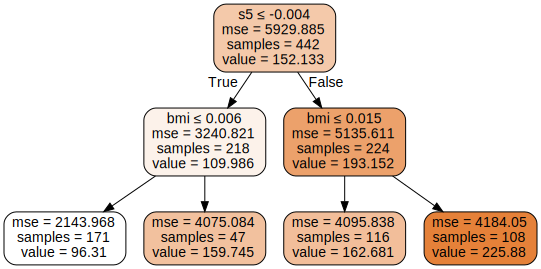

In [15]:
# 訓練ずみモデルのツリー表示
dot_data2 = tree.export_graphviz(clf, out_file=None, 
                         feature_names=diabetesdf.columns[0:10],  
                         filled=True, 
                         rounded = True, 
                         special_characters=True)  
graph2 = graphviz.Source(dot_data2)  
graph2 